# Parte 2: Exportación de datos

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('cosipy/data/input/Taller/Chuecon_ERA5.nc')

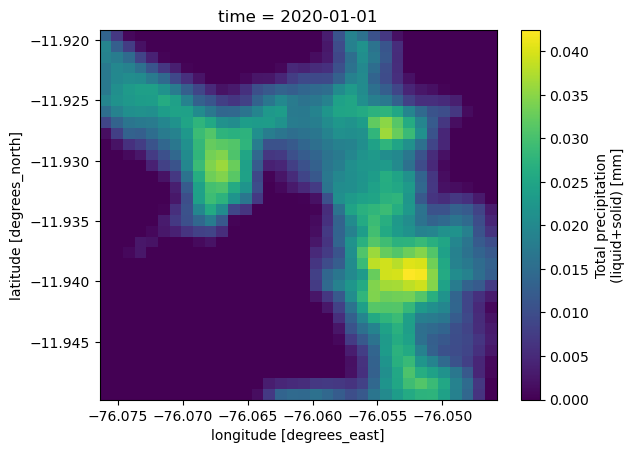

In [4]:
ds['RRR'][0].plot()